<a href="https://colab.research.google.com/github/diegocp01/diegocp01-github.io/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 74s 38ms/step - loss: 0.1473 - accuracy: 0.9542 - val_loss: 0.0427 - val_accuracy: 0.9853
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0443 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0486 - val_accuracy: 0.9854
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0415 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0365 - val_accuracy: 0.9891
313/313 - 2s - loss: 0.0365 - accuracy: 0.9891 - 2s/epoch - 6ms/step

Test accuracy: 0.9890999794006348


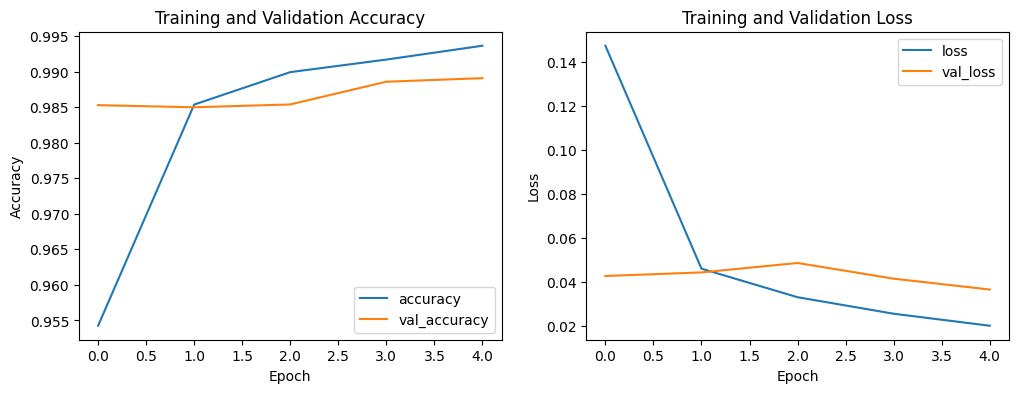

In [ ]:
# Convolutional Neural Network

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the Data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape the data to include channel dimension and normalize the pixel values
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Step 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Step 7: Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 [==============================] - 6s 19ms/step


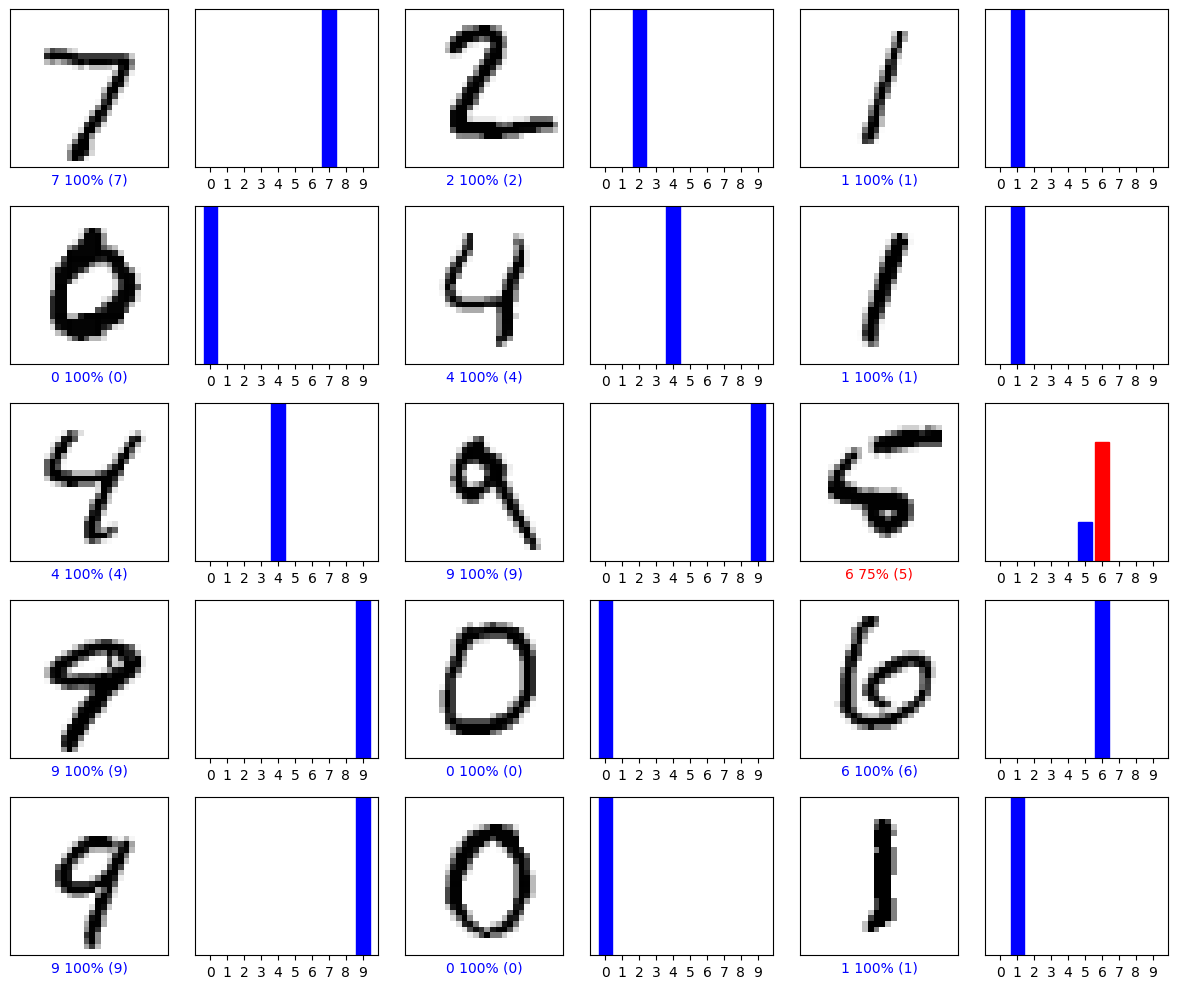

In [ ]:
# Step 8: Make Predictions
predictions = model.predict(test_images)

# Step 9: Visualize Predictions
import numpy as np

def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label),
               color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue, incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()